Each type of data or datasets is best visualized by certain kinds of charts, depending on both the targeted audience as well as the personal preferences of the data visualizer. In this exercise you will first simulate different types of data and datasets in python. Randomizations are usefull to understand certain statistical concepts and also as a basis for random sampling, which may be required when dealing with big data. Based on these simulated data, the exercise will consist on choosing the type of chart that you find more adequate to represent the different types of data and datasets.

# The objectives of this exercise are to:

#### identify each type of variables and tables that were created.

#### try your best to interpret each line of the code provided by inserting a note in front of each line (it might be usefull to create a jupiter notebook from the markdown file)

#### based on these simulated data, draw sketches of the charts that you find more adequate to represent the different types of data and datasets. You should identify the different axis of the plot, if applicable.

You will use two modules that provide pseudo-random number generators to implement random sampling routines. Have a look here (random module) and here (numpy.random module). Both allow to simulate data and take random samples, although np.random allows more pseudo-random generator methods to be implemented.

To run the simulations, you should first import pandas, numpy and random modules (in case you still did not installed these modules, you will need to install beforehand).



In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.stats import linregress

In [6]:
# Simulate var1

var1 = []
#used to keep the "same random" at each run
random.seed(24) # optional: used to fix the seed of the pseudo-random number generator (use any number of your choice)
levels = ["Permanent crops", "Irrigated crops", "Managed Forest", "Natural Forest", "Agro-Forestry system", "Urban", "Pasture", "Shrubland" ]
#The loop is needed to add 100 time a worf drom level in the list var1
for _ in range(100): # why is a loop needed?
    #Choose a randome word in the level list and add it to the var1 list
    var1 += random.sample(levels, 1) # var1.append(random.sample(levels, 1)) would also work

print(var1)

#The variable Var1 is a list of categorial data

['Pasture', 'Managed Forest', 'Natural Forest', 'Managed Forest', 'Natural Forest', 'Managed Forest', 'Irrigated crops', 'Managed Forest', 'Agro-Forestry system', 'Permanent crops', 'Shrubland', 'Shrubland', 'Irrigated crops', 'Permanent crops', 'Managed Forest', 'Shrubland', 'Shrubland', 'Agro-Forestry system', 'Shrubland', 'Irrigated crops', 'Agro-Forestry system', 'Managed Forest', 'Urban', 'Agro-Forestry system', 'Irrigated crops', 'Urban', 'Permanent crops', 'Natural Forest', 'Urban', 'Urban', 'Irrigated crops', 'Agro-Forestry system', 'Irrigated crops', 'Natural Forest', 'Managed Forest', 'Shrubland', 'Agro-Forestry system', 'Agro-Forestry system', 'Agro-Forestry system', 'Natural Forest', 'Irrigated crops', 'Shrubland', 'Managed Forest', 'Managed Forest', 'Urban', 'Shrubland', 'Natural Forest', 'Managed Forest', 'Shrubland', 'Agro-Forestry system', 'Natural Forest', 'Natural Forest', 'Irrigated crops', 'Managed Forest', 'Agro-Forestry system', 'Urban', 'Natural Forest', 'Pasture

In [7]:
# Simulate var2
np.random.seed(24) # optional: used to fix the seed of the pseudo-random number generator (use any number of your choice)
var2 = np.random.uniform(0, 100, 100)
#Here 100 float between 0 and 100 are simulated in folowing the uniforme distribution
#the result is an array of 100 random floating-point numbers sampled from a uniform distribution between 0 and 100
print(var2)

[96.00173033 69.95120499 99.98672926 22.00672998 36.1056354  73.98409902
 99.64557251 31.63469778 13.65445798 38.39800102 32.05192836 36.64147531
 70.96515626 90.01424305 53.41154392 24.72937649 67.18065626 56.17291073
 54.25598767 89.34476037 84.27795496 30.60125899 63.11697775 68.02388604
 97.04275604 89.35671519 94.24258614 64.22254812 61.46476338 22.76832544
 48.6031869  80.72192994 84.42201535 53.46808662 75.77980499 49.96768861
 85.03278966 61.96967754 86.16141791 23.16971966 40.22184146 62.43750622
 14.30367059 12.27984836 41.68299108 55.68829821 94.14191754 40.92590225
 73.67514494 99.54506744 91.66643492  0.20232726 97.13316932 88.90481767
 69.94886062  9.75246685 57.34290389 82.00371163 56.08910506 35.07624607
 54.34997561 87.95890917 11.40965649  3.14388054 95.28100604 28.87434744
 44.19491709 25.90215323 59.68914437 65.5286046  27.56954606 85.79724579
 88.87241464 28.50605911 65.95604191 97.21202594 79.68741126 17.94644012
 78.46729779 97.01278886 36.2811769   8.78860648 34

In [8]:
# Simulate table1
table1 = pd.DataFrame(var1).value_counts(sort=True)
#table is a DataFrame with two columns: the unique values from var1, and their corresponding counts, sorted in descending order of frequency
table1 = table1.rename_axis("landuse") #we rename the column of var1 values
table1 = table1.reset_index(name="Frequency") ##we rename the column of var1 values frequency
print(table1)

                landuse  Frequency
0  Agro-Forestry system         16
1                 Urban         14
2             Shrubland         14
3        Managed Forest         13
4        Natural Forest         12
5       Irrigated crops         12
6               Pasture         11
7       Permanent crops          8


EXEMPLE OF DATA VISUALIZATION FOR TAB 1


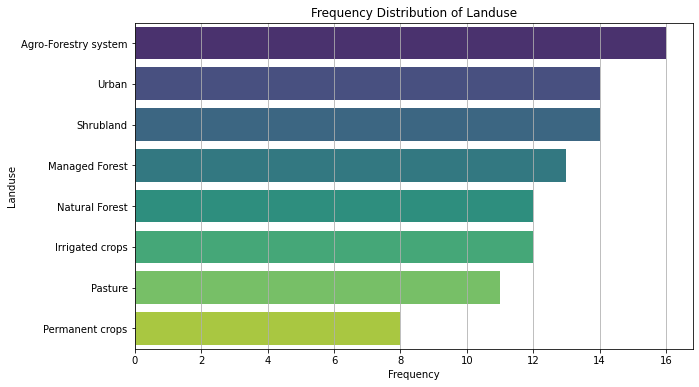

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="landuse", data=table1, palette="viridis")
plt.title("Frequency Distribution of Landuse")
plt.xlabel("Frequency")
plt.ylabel("Landuse")
plt.grid(axis='x')  # Add grid lines for better readability
plt.show()

In [19]:
# Simulate table2
table2 = pd.DataFrame(list(zip(var1, var2)), columns = ["landuse", "cover"])
# is a DataFrame with two columns: "landuse", containing values from var1, and "cover", containing values from var2. Each row of table2 corresponds to a pair of values from var1 and var2, respectively. 
print(table2)

# Note: The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together, etc. The tuple() function displays a readable version of the result - try running: print(tuple(zip(var1,var2)))


                 landuse      cover
0                Pasture  96.001730
1         Managed Forest  69.951205
2         Natural Forest  99.986729
3         Managed Forest  22.006730
4         Natural Forest  36.105635
..                   ...        ...
95  Agro-Forestry system  27.560264
96       Permanent crops  60.397982
97               Pasture  54.597285
98               Pasture  20.978981
99               Pasture  13.612275

[100 rows x 2 columns]


Visualition of table 2 with a decreasing barplot with error bar

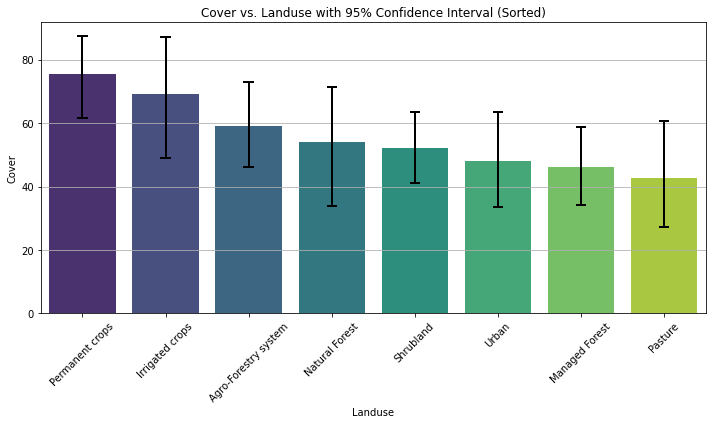

In [27]:
# Calculate mean cover for each landuse category
mean_cover = table2.groupby("landuse")["cover"].mean().sort_values(ascending=False)

# Reorder the table2 DataFrame based on the sorted landuse categories
table2 = table2.set_index("landuse").loc[mean_cover.index].reset_index()

# Create barplot with custom error bar appearance and sorted landuse categories
plt.figure(figsize=(10, 6))
sns.barplot(x="landuse", y="cover", data=table2, ci=95, palette="viridis", errcolor="black", errwidth=2, capsize=0.1
, order=mean_cover.index)
plt.title("Cover vs. Landuse with 95% Confidence Interval (Sorted)")
plt.xlabel("Landuse")
plt.ylabel("Cover")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()
plt.show()

In [10]:
# Simulate table3
np.random.seed(24) # optional: used to fix the seed of the pseudo-random number generator (use any number of your choice)
year = list(range(1970,2021))
#year is a list of int between 1970 and 2020 (include)
temp = np.random.normal(17,2,51)
# temp an array of 51 float following the normal distrivution of the following parameters (mean=17) and (standard deviation=2)
table3 = pd.DataFrame(list(zip(year, temp)), columns = ["Year", "Temperature"])

#Table 3 is a dataframe containing 51 row and two column With the corrsponding year and temperature 
print(table3)

    Year  Temperature
0   1970    19.658424
1   1971    15.459933
2   1972    16.367439
3   1973    15.018379
4   1974    14.858367
5   1975    14.122573
6   1976    18.128834
7   1977    17.591444
8   1978    13.747192
9   1979    17.439130
10  1980    18.357610
11  1981    20.778545
12  1982    18.923077
13  1983    17.208022
14  1984    16.037669
15  1985    18.700457
16  1986    19.906849
17  1987    19.115475
18  1988    17.331123
19  1989    18.030037
20  1990    14.326129
21  1991    18.125722
22  1992    19.785710
23  1993    16.873344
24  1994    17.243337
25  1995    19.415205
26  1996    16.995920
27  1997    20.255591
28  1998    17.708986
29  1999    19.075055
30  2000    16.228633
31  2001    18.039636
32  2002    20.373166
33  2003    14.348074
34  2004    19.857967
35  2005    12.821291
36  2006    16.740360
37  2007    18.263046
38  2008    15.826924
39  2009    17.581440
40  2010    19.528207
41  2011    17.580070
42  2012    13.059423
43  2013    18.607812
44  2014  

Visualisation with a simple line plot

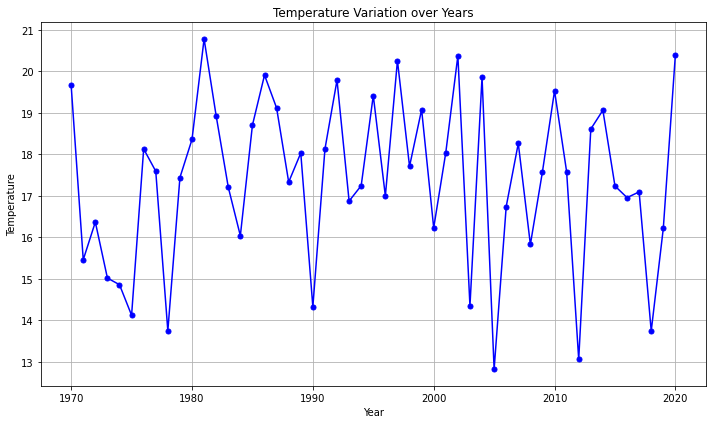

In [28]:
# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(table3["Year"], table3["Temperature"], marker='o', linestyle='-', color='b', markersize=5)
plt.title("Temperature Variation over Years")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

In [38]:
# Simulate table4
xx = np.array([16,21])
#create an array
yy = np.array([300, 1200])
#create an array
means = [xx.mean(), yy.mean()]  
#Create a list with the two mean of previous arrays
stds = [xx.std() / 3, yy.std() / 3]
#This line calculates the standard deviations of the arrays xx and yy, and then divides each by 3

corr = -0.7 # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] # covariance matrix

table4 = pd.DataFrame(np.random.multivariate_normal(means, covs, 100), columns = ["Mean Anual Temperature", "Total Precipitation"])


#This part generates 100 random samples from a multivariate normal distribution with the specified means and covariance matrix.
#Table 4 is a DataFrame containing 100 rows of randomly generated data based on specified mean values, standard deviations, and a correlation coefficient.

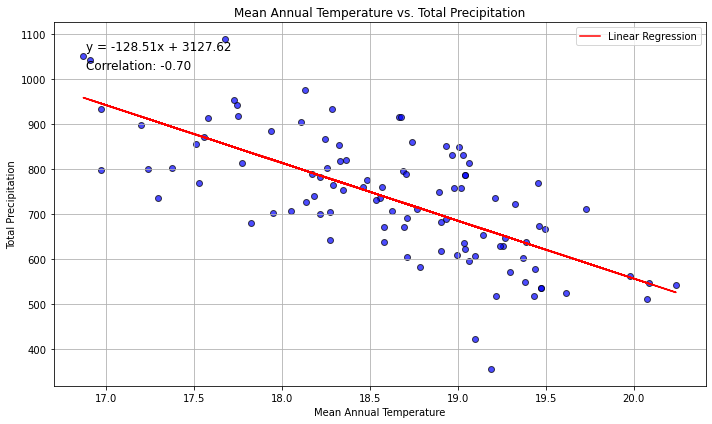

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(table4["Mean Anual Temperature"], table4["Total Precipitation"], alpha=0.7, c='b', edgecolors='k')
plt.title("Mean Annual Temperature vs. Total Precipitation")
plt.xlabel("Mean Annual Temperature")
plt.ylabel("Total Precipitation")
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()

slope, intercept, r_value, p_value, std_err = linregress(table4["Mean Anual Temperature"], table4["Total Precipitation"])

# Add regression line
plt.plot(table4["Mean Anual Temperature"], slope * table4["Mean Anual Temperature"] + intercept, color='r', label='Linear Regression')

# Add equation and correlation value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
correlation_value = f'Correlation: {r_value:.2f}'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, correlation_value, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.legend()
plt.tight_layout()



plt.show()

In [13]:
# Simulate table5
col1 = pd.Series(list(range(1900,2010,10))).repeat(8)
#results in a Series where each value from 1900 to 2000 with a step of 10 is repeated 8 times. it is int variable
col2 = ["Permanent crops", "Irrigated crops", "Managed Forest", "Natural Forest", "Agro-Forestry system", "Urban", "Pasture", "Shrubland" ]*11
#col2 is a list containing 88 elements, with the land use categories repeated. It is a categorial variable 
col3 = np.random.uniform(0, 100, 90)
# col3is a NumPy array containing 90 random floating-point numbers.
table5 = pd.DataFrame(list(zip(col1, col2, col3)), columns = ["Year", "Landuse", "Cover"])
#col 5 is a dataframe containing 3 column and 88 row. 
print(table5)

    Year               Landuse      Cover
0   1900       Permanent crops  15.901162
1   1900       Irrigated crops  46.617287
2   1900        Managed Forest  61.941935
3   1900        Natural Forest  29.189952
4   1900  Agro-Forestry system  10.718345
..   ...                   ...        ...
83  2000        Natural Forest  36.180310
84  2000  Agro-Forestry system  87.194419
85  2000                 Urban  21.059268
86  2000               Pasture  60.523085
87  2000             Shrubland  63.547643

[88 rows x 3 columns]


EXEMPLE OF DATA VISULIZATION FOR TAB5

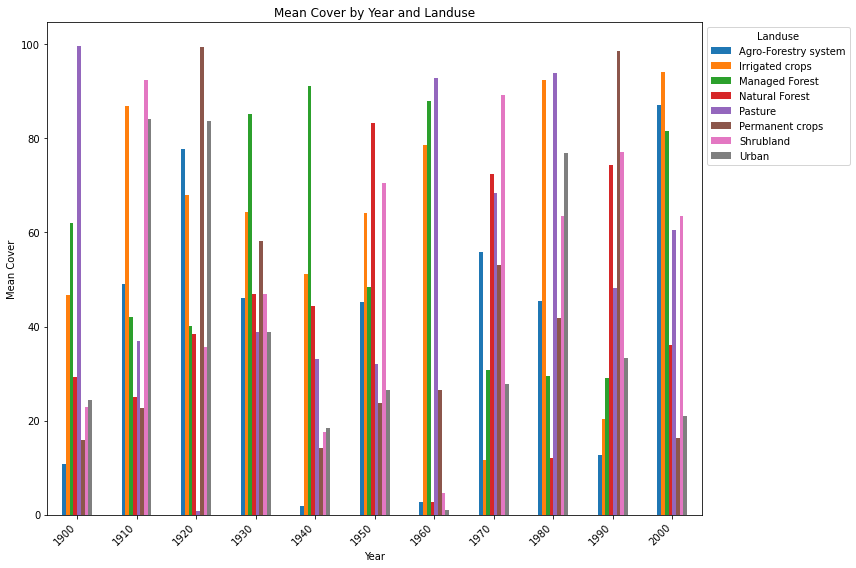

In [16]:
# Group by Year and Landuse, and calculate mean Cover
grouped_data = table5.groupby(['Year', 'Landuse'])['Cover'].mean().unstack()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
ax.set_title('Mean Cover by Year and Landuse')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Cover')
ax.legend(title='Landuse', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()